In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Toddler Autism dataset July 2018.csv")
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
# Detecting any missing values
data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

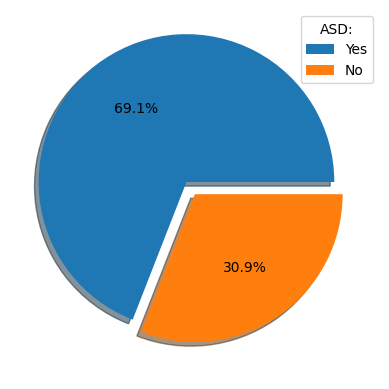

In [ ]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

In [ ]:
data.groupby('Sex').size()


Sex
f    319
m    735
dtype: int64

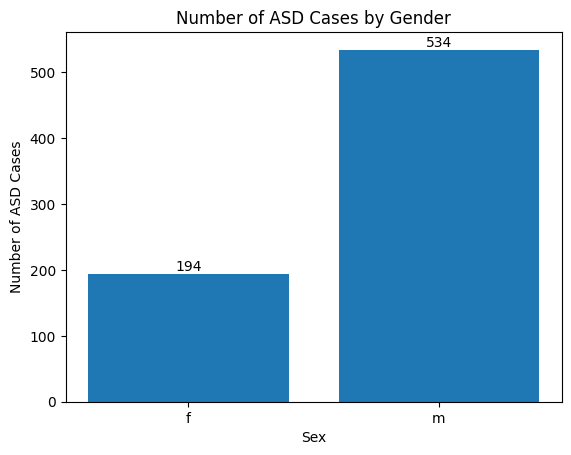

In [ ]:
asd_counts_sex = data[data['Class/ASD Traits '] == 'Yes'].groupby('Sex').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of ASD Cases')
plt.title('Number of ASD Cases by Gender')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

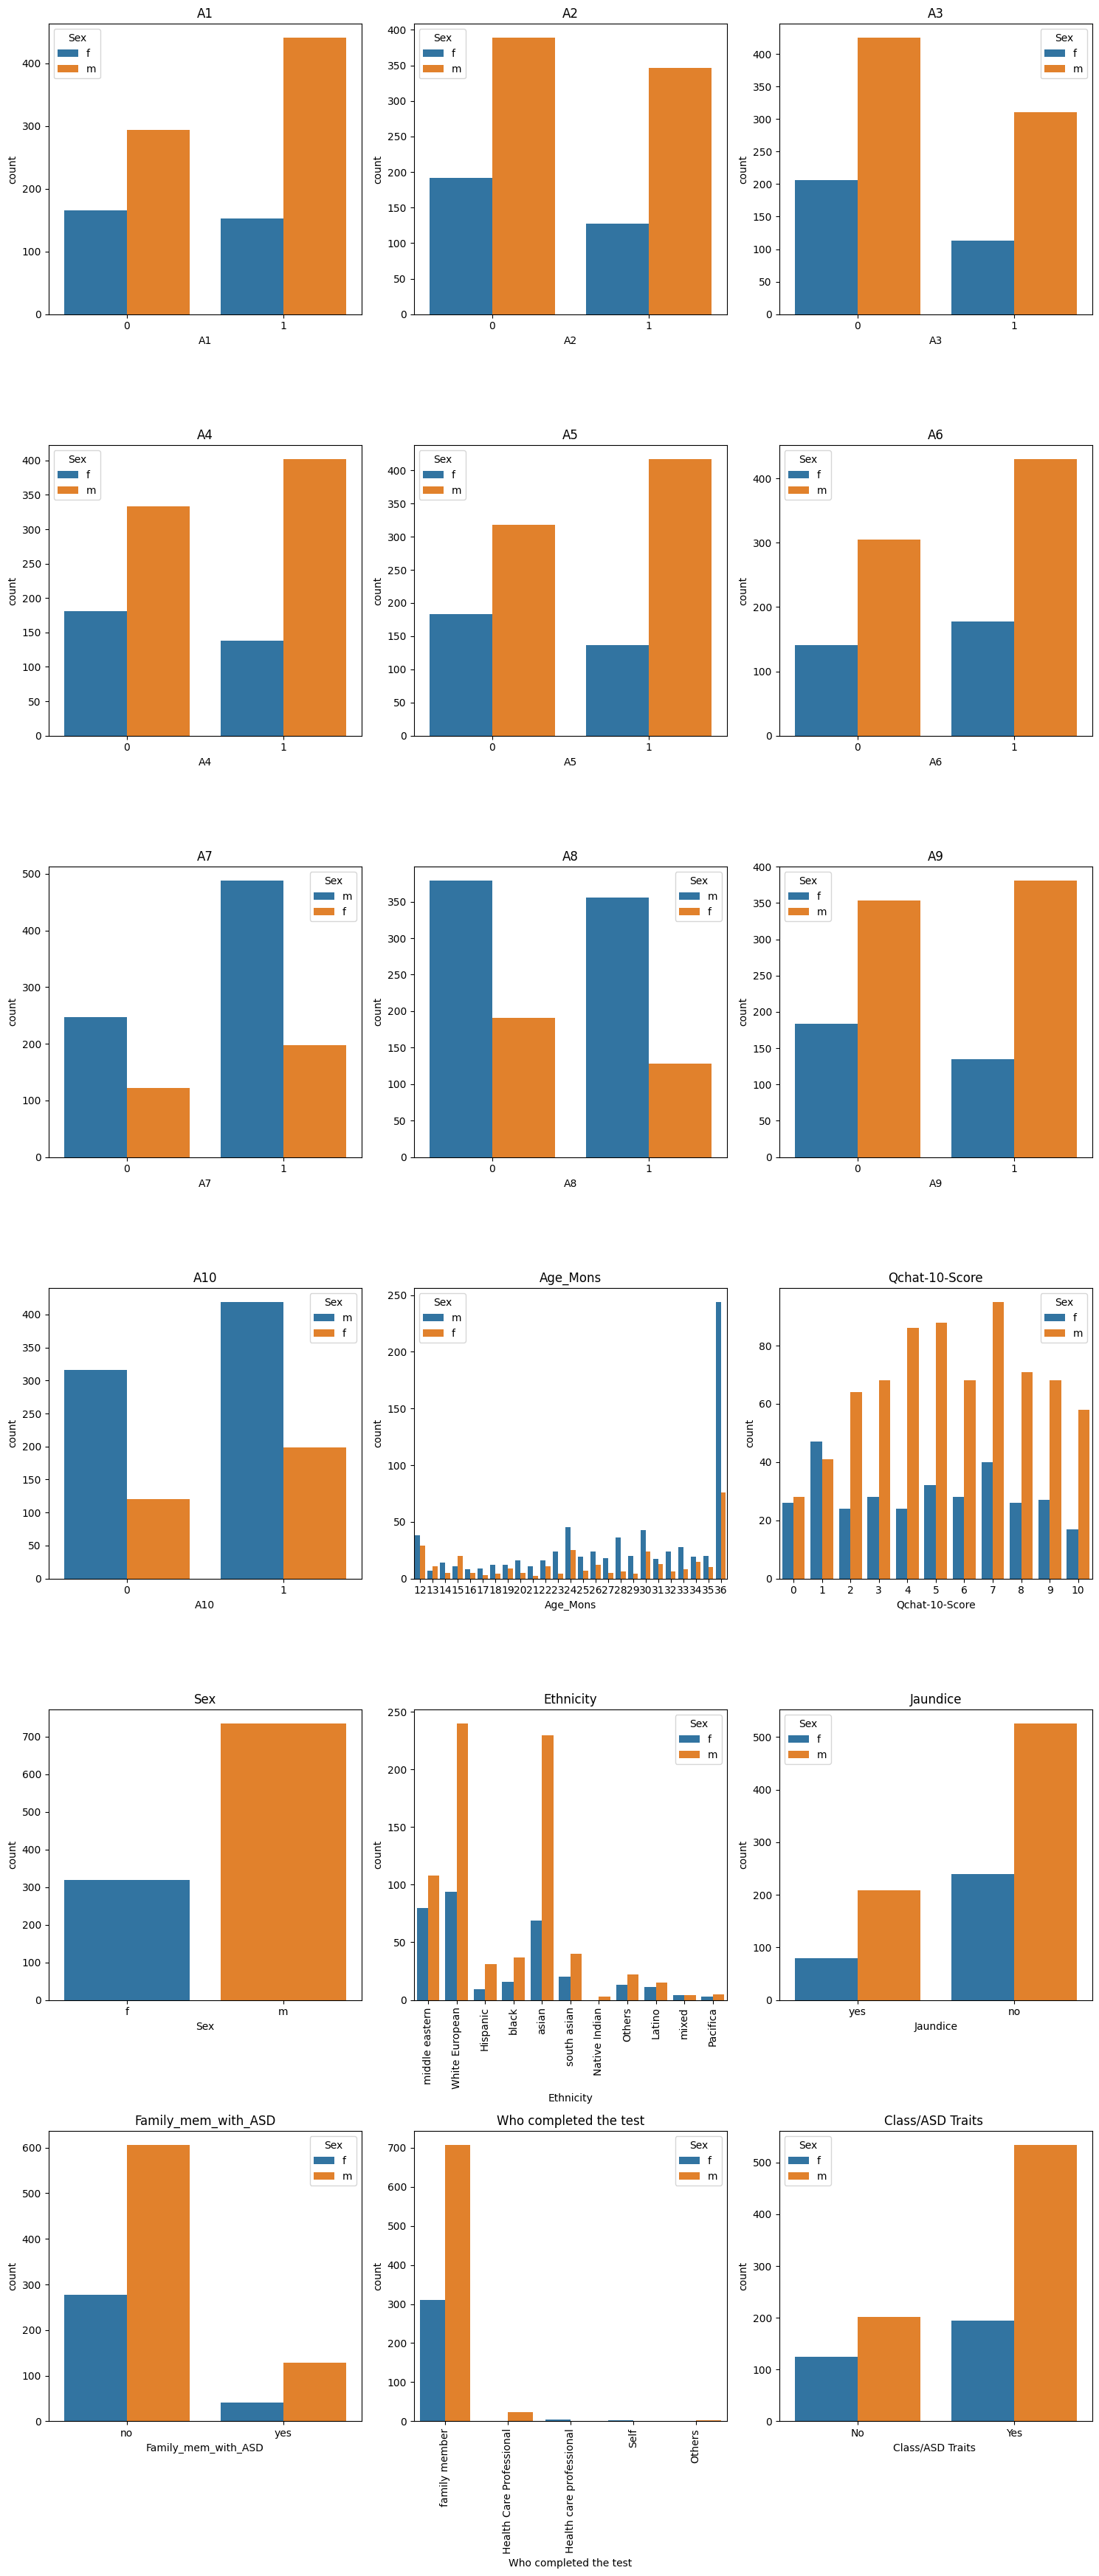

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Sex"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

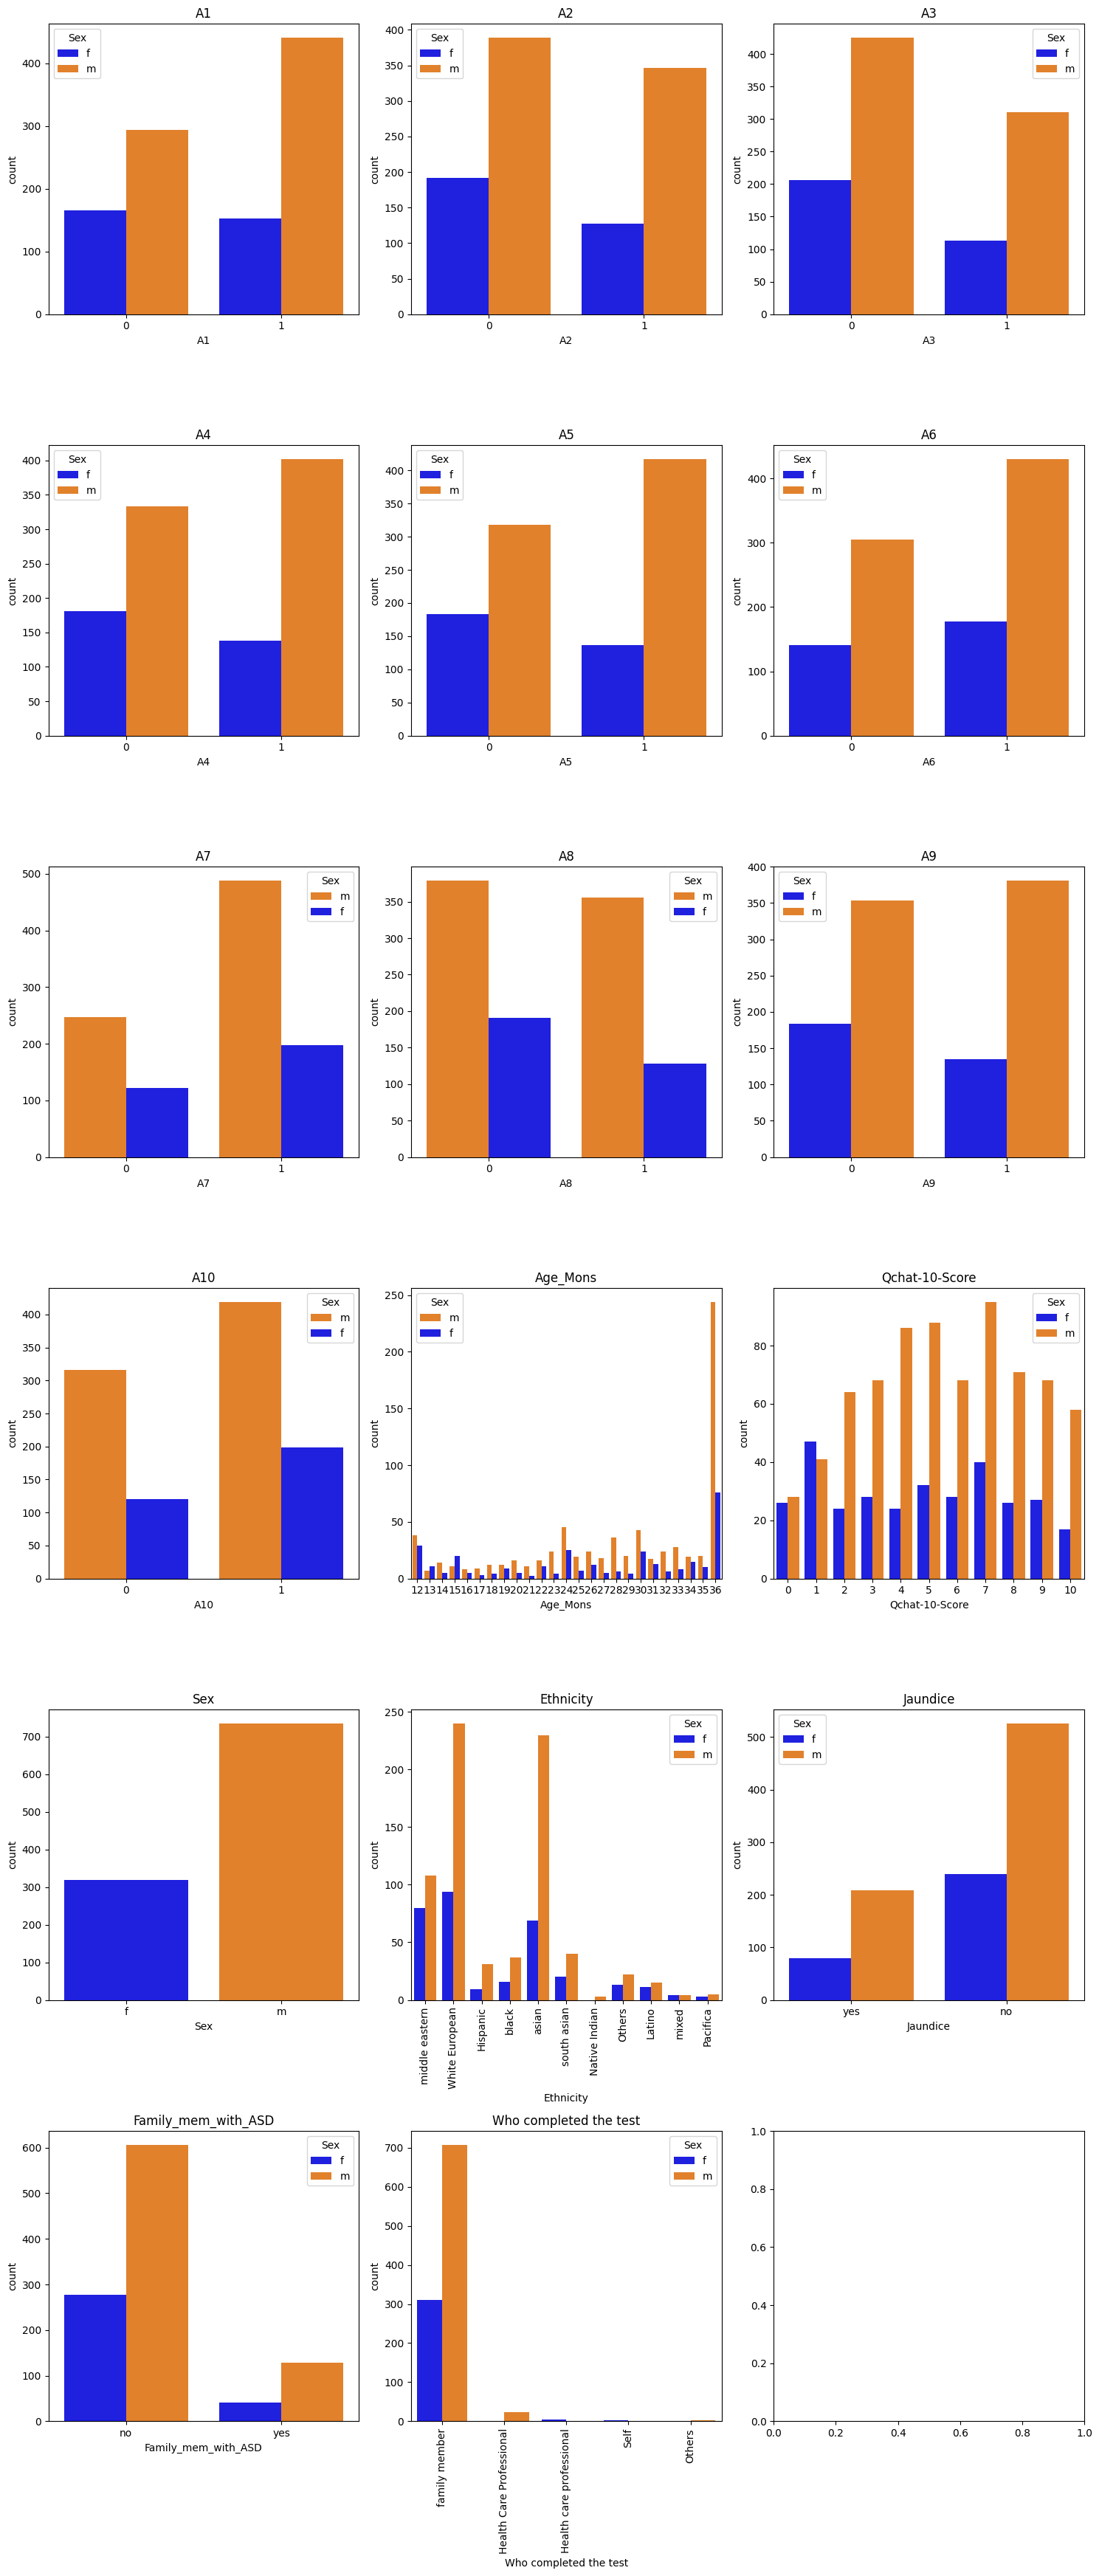

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting up the color palette for consistent coloring
# Ensure the keys match the 'Sex' column values used in your DataFrame
palette = {"m": "#FF7F0E", "f": "blue"}

# Setting up the figure and axes
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()  # Flatten the array of axes

# Loop through the columns and create a countplot for each
for i, col in enumerate(data.columns[1:18]):  # Make sure this doesn't exceed the number of axes
    # Generate countplots. Ensure to handle cases where columns are not valid for a countplot.
    sns.countplot(data=data, x=col, hue="Sex", palette=palette, ax=axes[i])
    axes[i].set_title(col)
    # Rotate x-axis labels for specific columns
    if col in ["Who completed the test", "Ethnicity", "Age Months"]:
        axes[i].tick_params(axis='x', labelrotation=90)

# Ensure the layout is properly handled so labels and titles do not overlap
plt.tight_layout()
plt.show()


In [ ]:
data.groupby('Jaundice').size()

Jaundice
no     766
yes    288
dtype: int64

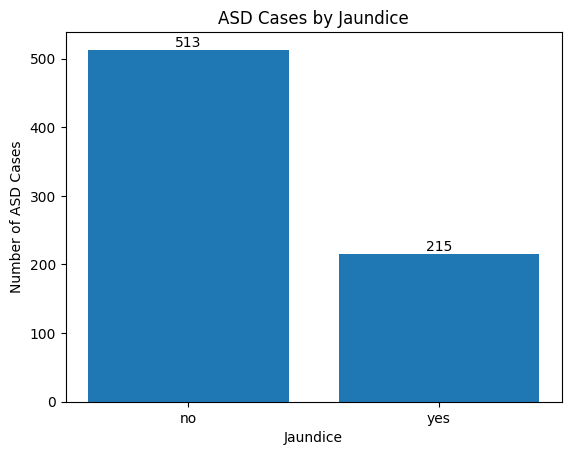

In [ ]:
# Toddlers who have ASD and then they have Jaundice
asd_counts_jaundice = data[data['Class/ASD Traits '] == 'Yes'].groupby('Jaundice').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('Jaundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

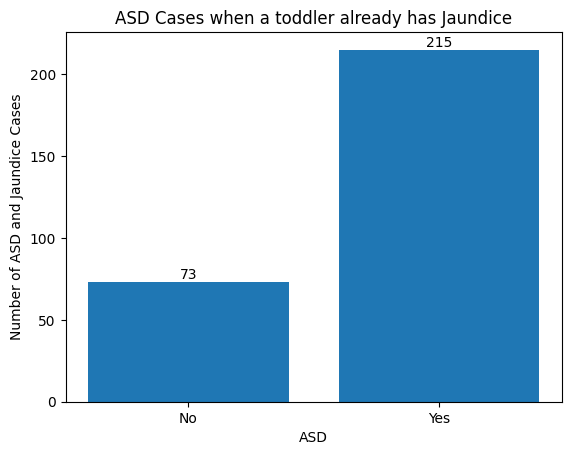

In [ ]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
# Ensure you have the pandas library installed and your dataset loaded into a DataFrame named `data`
import pandas as pd

# Assuming 'data' is your DataFrame
# Ensure that 'Jaundice' and 'ASD' columns exist and contain the values 'yes' for positive cases
# Also ensure 'Sex' column contains 'm' for males and 'f' for females or adjust the strings as per your dataset

# Filter for individuals with both jaundice and ASD
jaundice_asd_patients = data[(data['Jaundice'] == 'yes') & (data['Class/ASD Traits '] == 'Yes')]

# Count the number of males and females within this filtered group
gender_counts_jaundice_asd = jaundice_asd_patients['Sex'].value_counts()

# Calculate the ratio of males to females
# This checks to ensure both males and females are present to avoid division by zero
if 'm' in gender_counts_jaundice_asd.index and 'f' in gender_counts_jaundice_asd.index:
    male_to_female_ratio_jaundice_asd = gender_counts_jaundice_asd['m'] / gender_counts_jaundice_asd['f']
else:
    male_to_female_ratio_jaundice_asd = "Insufficient data for either male or female"

print("Male to Female Ratio of Jaundice Patients who are ASD Affected:", male_to_female_ratio_jaundice_asd)


Male to Female Ratio of Jaundice Patients who are ASD Affected: 3.4791666666666665


Table 1. Trend of Jaundice and ASD Patients by Gender:
Gender  Count  Percentage     Ratio
  Male    167   77.674419         -
Female     48   22.325581         -
 Total    215  100.000000  3.479167


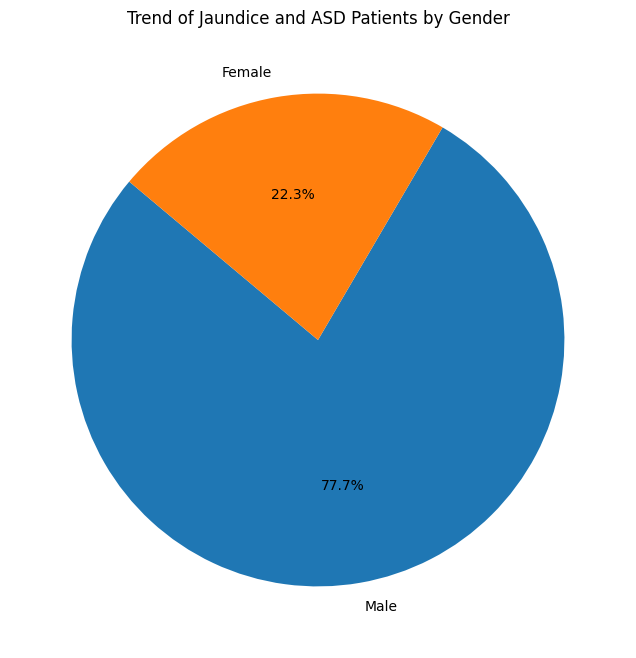

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'Sex', 'Jaundice', and 'ASD' columns
# Example of filtering for jaundice and ASD affected patients
filtered_data = data[(data['Jaundice'] == 'yes') & (data['Class/ASD Traits '] == 'Yes')]

# Count males and females
gender_counts = filtered_data['Sex'].value_counts()
male_count = gender_counts.get('m', 0)
female_count = gender_counts.get('f', 0)

# Calculate ratio and percentage
male_female_ratio = male_count / female_count if female_count else float('nan')  # Handle division by zero
male_percentage = (male_count / (male_count + female_count) * 100) if (male_count + female_count) else 0
female_percentage = (female_count / (male_count + female_count) * 100) if (male_count + female_count) else 0

# Create a DataFrame for the table, directly incorporating 'Ratio' correctly
table_data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Total'],
    'Count': [male_count, female_count, male_count + female_count],
    'Percentage': [male_percentage, female_percentage, 100],
    'Ratio': ['-', '-', male_female_ratio]  # Place the ratio at the 'Total' row
})

# Displaying the table
print("Table 1. Trend of Jaundice and ASD Patients by Gender:")
print(table_data.to_string(index=False))

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(table_data[:-1]['Count'], labels=table_data[:-1]['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Trend of Jaundice and ASD Patients by Gender')
plt.show()
